In [1]:
!pip install seaborn

#### Trying Rainy Week/Month that fail in the end due to the sparce days in a week/month data in the dataset

In [2]:
# adding rainy weeks and month in the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
original_df = pd.read_csv('content/data/train-val.csv')

# Convert 'Date' to datetime
original_df['Date'] = pd.to_datetime(original_df['Date'])

# Calculate the week of the year and the month from 'Date'
original_df['WeekOfYear'] = original_df['Date'].dt.isocalendar().week
original_df['MonthOfYear'] = original_df['Date'].dt.month

# Determine if more than half the days in each week/month had rain
rainy_week = original_df.groupby('WeekOfYear')['RainToday'].transform(lambda x: (x.sum() / x.count()) > 0.3)
rainy_month = original_df.groupby('MonthOfYear')['RainToday'].transform(lambda x: (x.sum() / x.count()) > 0.2)

# Add the new attributes to the DataFrame
original_df['RainyWeek'] = rainy_week.astype(int)
original_df['RainyMonth'] = rainy_month.astype(int)

# Save the modified DataFrame to a new CSV file if needed
original_df.to_csv('content/data/extra_rainy_train-val.csv', index=False)


## For version 2 that imputes with regressors use the attributes that are highly correlated with the missing ones we need to impute

In [3]:
# # Writing an upgraded version of the Imputer class
# 
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# import pandas as pd
# import numpy as np
# import pickle
# import os
# 
# 
# class UpgradedImputer(BaseEstimator, TransformerMixin):
#     def __init__(self, target, correlated_features=None, model=None, params_grid=None, save_path='models/'):
#         self.target = target
#         self.correlated_features = correlated_features
#         self.model = model if model else RandomForestRegressor(random_state=42)
#         self.params_grid = params_grid
#         self.trained_model = None
#         self.save_path = save_path
# 
#     def fit(self, X, y=None):
#         # Filtering data  
#         if self.correlated_features:
#             X = X[self.correlated_features]
# 
#         # Separating the target and features
#         y_train = X[self.target]
#         X_train = X.drop(columns=[self.target])
# 
#         # Handling only rows where the target is not null
#         X_train = X_train[y_train.notnull()]
#         y_train = y_train[y_train.notnull()]
# 
#         # Grid Search for model optimization
#         if self.params_grid:
#             self.trained_model = GridSearchCV(self.model, self.params_grid, cv=5, n_jobs=-1, verbose=2)
#         else:
#             self.trained_model = self.model
# 
#         self.trained_model.fit(X_train, y_train)
#         return self
# 
#     def transform(self, X, y=None):
#         if self.target not in X:
#             return X
# 
#         # Apply the model to fill missing values
#         missing_indices = X[self.target].isnull()
#         if missing_indices.any():
#             X_missing = X[missing_indices].drop(columns=[self.target])
#             X.loc[missing_indices, self.target] = self.trained_model.predict(X_missing)
# 
#         return X
# 
#     def fit_transform(self, X, y=None):
#         return self.fit(X, y).transform(X, y)
# 
#     def save_model(self, filename=None):
#         if not filename:
#             filename = f'{self.target}_imputer.pkl'
#         with open(os.path.join(self.save_path, filename), 'wb') as file:
#             pickle.dump(self.trained_model, file)
# 
#     def load_model(self, filename):
#         with open(os.path.join(self.save_path, filename), 'rb') as file:
#             self.trained_model = pickle.load(file)


# Creating and training imputers for different features and saving the models
# cloud3pm_imputer = UpgradedImputer(target='Cloud3pm', correlated_features=list(high_corr_dict['Cloud3pm'].keys()))
# cloud3pm_imputer.fit_transform(data)
# cloud3pm_imputer.save_model('cloud3pm_imputer.pkl')
# 
# sunshine_imputer = UpgradedImputer(target='Sunshine', correlated_features=list(high_corr_dict['Sunshine'].keys()))
# sunshine_imputer.fit_transform(data)
# sunshine_imputer.save_model('sunshine_imputer.pkl')
# 
# cloud9am_imputer = UpgradedImputer(target='Cloud9am', correlated_features=list(high_corr_dict['Cloud9am'].keys()))
# cloud9am_imputer.fit_transform(data)
# cloud9am_imputer.save_model('cloud9am_imputer.pkl')
# 
# evaporation_imputer = UpgradedImputer(target='Evaporation',
#                                       correlated_features=list(high_corr_dict['Evaporation'].keys()))
# evaporation_imputer.fit_transform(data)
# evaporation_imputer.save_model('evaporation_imputer.pkl')
# 
# # Repeat for test data imputers
# test_cloud3pm_imputer = UpgradedImputer(target='Cloud3pm',
#                                         correlated_features=list(test_high_corr_dict['Cloud3pm'].keys()))
# test_cloud3pm_imputer.fit_transform(test_data)
# test_cloud3pm_imputer.save_model('test_cloud3pm_imputer.pkl')
# 
# test_sunshine_imputer = UpgradedImputer(target='Sunshine',
#                                         correlated_features=list(test_high_corr_dict['Sunshine'].keys()))
# test_sunshine_imputer.fit_transform(test_data)
# test_sunshine_imputer.save_model('test_sunshine_imputer.pkl')
# 
# test_cloud9am_imputer = UpgradedImputer(target='Cloud9am',
#                                         correlated_features=list(test_high_corr_dict['Cloud9am'].keys()))
# test_cloud9am_imputer.fit_transform(test_data)
# test_cloud9am_imputer.save_model('test_cloud9am_imputer.pkl')
# 
# test_evaporation_imputer = UpgradedImputer(target='Evaporation',
#                                            correlated_features=list(test_high_corr_dict['Evaporation'].keys()))
# test_evaporation_imputer.fit_transform(test_data)
# test_evaporation_imputer.save_model('test_evaporation_imputer.pkl')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

import os

original_train = pd.read_csv('content/data/train-val.csv')

class Imputer:
    def __init__(self, train_attrs: list[str], target: str, read_csv_path='', instant_train=False):
        global original_train
        self.target = target
        self.train_attrs = train_attrs
        self.read_csv_path = read_csv_path
        self._X_train = None
        self._y_train = None
        self.best_params = None
        self.best_score = None
        self.imputer = None
        self.missing_over_40 = None
        self.imputer_train_df = pd.read_csv(self.read_csv_path) if read_csv_path != '' else self.filter_df(set(train_attrs))
        if instant_train: self.fit()
    
    def filter_df(self, train_attrs: set):
        self.missing_over_40 = {'Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'}
        to_fill_with_median = train_attrs - self.missing_over_40 - set(self.target)
        drop_attrs = (train_attrs.union({self.target})).intersection(self.missing_over_40)
        all_columns = list(train_attrs) + [self.target]
        print(drop_attrs, all_columns)
    
        filtered_df = original_train[all_columns].dropna(subset=list(drop_attrs), how='any').copy()
    
        for _col in to_fill_with_median:
            _median_value = filtered_df[_col].median()
            filtered_df.loc[:, _col] = filtered_df[_col].fillna(_median_value)
    
        print(filtered_df.isnull().sum())
    
        return filtered_df
    
    def fit(self, model=None):
        print('Training started')
        print(self.imputer_train_df.columns)
        if 'Unnamed: 0' in self.imputer_train_df.columns:
            self.imputer_train_df.drop(columns='Unnamed: 0', inplace=True)
    
        _X = self.imputer_train_df.drop(self.target, axis=1)
        _y = self.imputer_train_df[self.target].dropna()
    
        self._X_train, _X_val, self._y_train, _y_val = train_test_split(_X, _y, test_size=0.2, random_state=42)
    
        if model is None:
            self.imputer = RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=2,
                                                 n_estimators=400,
                                                 random_state=42)
        else:
            self.imputer = model
    
        # Train the RandomForestRegressor on the training set
        self.imputer.fit(self._X_train, self._y_train)
    
        # Predict the 'Sunshine' column for the test set
        _y_pred = self.imputer.predict(_X_val)
    
        # Evaluate the model performance
        _mse = mean_squared_error(_y_val, _y_pred)
        _r2 = r2_score(_y_val, _y_pred)
    
        print(f'Training finished!\n mse = {_mse}, r2 = {_r2}')
    
    def grid_search(self, param_grid=None):
        if param_grid is None:
            print('No parameter grip passed')
            pass
        try:
            param_grid = {
                'n_estimators': [200, 400],
                'max_depth': [10, 20],
                'min_samples_split': [2],
                'min_samples_leaf': [2, 4],
            }
    
            # Initialize the grid search with cross-validation
            self.imputer = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                                        param_grid=param_grid,
                                        cv=5,  # 5-fold cross-validation
                                        n_jobs=-1,  # Use all available cores
                                        verbose=2)
    
            # Perform the grid search on the training data
            self.imputer.fit(self._X_train, self._y_train)
    
            # Best parameters found by grid search
            self.best_params = self.imputer.best_params_
            self.best_score = self.imputer.best_score_
    
            print('The best parameters-score found are:\n', self.best_params, self.best_score)
    
        except Exception as e:
            print(e)
    
    def save_impute_csv(self):
        # Ορίστε τον κατάλογο όπου θα αποθηκεύονται τα αρχεία
        directory = 'content/data/'
        prefix = f'{self.target}_imputer_train_'
        suffix = '.csv'
    
        # Βρείτε τον υψηλότερο δείκτη αρχείου που έχει ήδη χρησιμοποιηθεί
        max_index = 0
        for filename in os.listdir(directory):
            if filename.startswith(prefix) and filename.endswith(suffix):
                # Αφαιρέστε το prefix και το suffix για να πάρετε μόνο τον αριθμό
                index_part = filename[len(prefix):-len(suffix)]
                if index_part.isdigit():
                    max_index = max(max_index, int(index_part))
    
        # Ορίστε τον επόμενο δείκτη για το νέο αρχείο
        next_index = max_index + 1
    
        # Δημιουργήστε το όνομα του αρχείου με τον νέο δείκτη
        filename = f'{directory}{prefix}{next_index}{suffix}'
    
        # Αποθηκεύστε το DataFrame σε CSV
        self.imputer_train_df.to_csv(filename)
        print(f'File saved as {filename}')
    
    def load_impute_csv(self, new_imputer_train_csv_path):
        self.imputer_train_df = pd.read_csv(new_imputer_train_csv_path)


Initializing useful variables to be used for imputation

In [87]:
filtered_data = original_train.dropna(subset=['Sunshine', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow'])

numeric_data = filtered_data.select_dtypes(include='number')
full_correlation_matrix = numeric_data.corr()

excluded_features = ['Cloud9am', 'Cloud3pm', 'Sunshine', 'Evaporation'] # because with them, we get left with many missing values even with imputation
test_excluded_features = ['Cloud9am', 'Cloud3pm', 'Sunshine', 'Evaporation', 'RainTomorrow']

selected_features = ['Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow', 'Sunshine', 'Evaporation']

high_corr_dict = {
    feature: abs_corr[(abs_corr > 0.3) & (~abs_corr.index.isin(excluded_features))].drop(feature, errors='ignore')
    for feature in selected_features
    if (abs_corr := abs(full_correlation_matrix[feature]).sort_values(ascending=False)).any()
}

test_high_corr_dict = {
    feature: abs_corr[(abs_corr > 0.3) & (~abs_corr.index.isin(test_excluded_features))].drop(feature, errors='ignore')
    for feature in selected_features
    if (abs_corr := abs(full_correlation_matrix[feature]).sort_values(ascending=False)).any()
}

# Same for the test s# Finding the missing values percentage of every attribute:
# Calculate the number of missing values and the percentage of the total for each column
# test_data = pd.read_csv(test_dataset_path)
test_data = pd.read_csv('content/data/new_test.csv')
missing_values_count = test_data.isnull().sum()
missing_values_percentage = (missing_values_count / len(test_data)) * 100

# Create a dataframe for missing values count and percentage for each column
missing_values_df = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage': missing_values_percentage
})

missing_values_df_sorted = missing_values_df[missing_values_df['Missing Values'] > 0].sort_values(by='Percentage',
                                                                                                  ascending=False)

In [88]:
cloud3pm_imputer = Imputer(high_corr_dict['Cloud3pm'].keys(), 'Cloud3pm', instant_train=True)
sunshine_imputer = Imputer(high_corr_dict['Sunshine'].keys(), 'Sunshine', instant_train=True)
cloud9am_imputer = Imputer(high_corr_dict['Cloud9am'].keys(), 'Cloud9am', instant_train=True)
evaporation_imputer = Imputer(high_corr_dict['Evaporation'].keys(), 'Evaporation', instant_train=True)

test_cloud3pm_imputer = Imputer(test_high_corr_dict['Cloud3pm'].keys(), 'Cloud3pm', instant_train=True)
test_sunshine_imputer = Imputer(test_high_corr_dict['Sunshine'].keys(), 'Sunshine', instant_train=True)
test_cloud9am_imputer = Imputer(test_high_corr_dict['Cloud9am'].keys(), 'Cloud9am', instant_train=True)
test_evaporation_imputer = Imputer(test_high_corr_dict['Evaporation'].keys(), 'Evaporation', instant_train=True)

import pickle

with open('sunshine.pkl', 'wb') as file:
    pickle.dump(sunshine_imputer.imputer, file)
with open('cloud9am.pkl', 'wb') as file:
    pickle.dump(cloud9am_imputer.imputer, file)
with open('cloud3pm.pkl', 'wb') as file:
    pickle.dump(cloud3pm_imputer.imputer, file)
with open('evaporation.pkl', 'wb') as file:
    pickle.dump(evaporation_imputer.imputer, file)

with open('test_sunshine.pkl', 'wb') as file:
    pickle.dump(test_sunshine_imputer.imputer, file)
with open('test_cloud9am.pkl', 'wb') as file:
    pickle.dump(test_cloud9am_imputer.imputer, file)
with open('test_cloud3pm.pkl', 'wb') as file:
    pickle.dump(test_cloud3pm_imputer.imputer, file)
with open('test_evaporation.pkl', 'wb') as file:
    pickle.dump(test_evaporation_imputer.imputer, file)

# TODO EXPLAIN R2 LOSS

{'Cloud3pm'} ['Temp3pm', 'Humidity3pm', 'Humidity9am', 'RainTomorrow', 'Cloud3pm']
Temp3pm         0
Humidity3pm     0
Humidity9am     0
RainTomorrow    0
Cloud3pm        0
dtype: int64
Training started
Index(['Temp3pm', 'Humidity3pm', 'Humidity9am', 'RainTomorrow', 'Cloud3pm'], dtype='object')
Training finished!
 mse = 4.9196747489073775, r2 = 0.3324979791647579
{'Sunshine'} ['Temp3pm', 'Humidity3pm', 'MaxTemp', 'RainTomorrow', 'RainToday', 'Humidity9am', 'Sunshine']
Temp3pm         0
Humidity3pm     0
MaxTemp         0
RainTomorrow    0
RainToday       0
Humidity9am     0
Sunshine        0
dtype: int64
Training started
Index(['Temp3pm', 'Humidity3pm', 'MaxTemp', 'RainTomorrow', 'RainToday',
       'Humidity9am', 'Sunshine'],
      dtype='object')
Training finished!
 mse = 6.179001755606927, r2 = 0.5098022959802327
{'Cloud9am'} ['Humidity3pm', 'RainToday', 'Humidity9am', 'RainTomorrow', 'Cloud9am']
Humidity3pm     0
RainToday       0
Humidity9am     0
RainTomorrow    0
Cloud9am       

In [89]:
# Now first impute the low missing valued attrs with median and then impute the high valued ones with the Imputers

# Adjusting the imputation process to handle both numeric and categorical columns appropriately
columns_to_impute = missing_values_df_sorted[missing_values_df_sorted['Percentage'] < 10].index.tolist()

imputed_data = original_train.copy()

for column in columns_to_impute:
    if column not in ['id', 'Date', 'Location', 'Rainfall', 'RainToday', 'RainTomorrow']:
        # Check if the column is of numeric type
        if pd.api.types.is_numeric_dtype(imputed_data[column]):
            median_value = imputed_data[column].median()
            imputed_data[column].fillna(median_value, inplace=True)
        else:
            # For categorical columns, use the mode
            mode_value = imputed_data[column].mode()[0]
            imputed_data[column].fillna(mode_value, inplace=True)

# Verify if the imputation is successful by checking missing values again
imputed_missing_values = imputed_data.isnull().sum()

# Save the modified dataframe to a new CSV file
imputed_data_path = 'content/data/low_imputed_train_val.csv'
imputed_data.to_csv(imputed_data_path, index=False)

print(imputed_data.shape, imputed_missing_values)

# Now for test

import pandas as pd

# Load the dataset
original_test = pd.read_csv('content/data/new_test.csv')

# Calculate the count and percentage of missing values for each column
test_miss_cnt = original_test.isnull().sum()
test_miss_percent = (test_miss_cnt / len(original_test)) * 100

# Create a dataframe to display the missing values count and percentage for each column
test_miss_values_df = pd.DataFrame({
    'Missing Values': test_miss_cnt,
    'Percentage': test_miss_percent
})

# Filter columns where the percentage of missing values is less than 10%
columns_to_impute = test_miss_values_df[test_miss_values_df['Percentage'] < 10].index

# Impute missing values with median for numerical attributes and mode for categorical attributes
for column in columns_to_impute:
    if original_test[column].dtype == 'object':  # Assuming object dtype implies categorical
        # Impute with the mode (the most frequent value)
        mode_value = original_test[column].mode()[0]
        original_test[column].fillna(mode_value, inplace=True)
    else:
        # Impute with the median
        median_value = original_test[column].median()
        original_test[column].fillna(median_value, inplace=True)

# Verify the imputation
print(original_test.isnull().sum())

original_test.to_csv('content/data/low_imputed_test.csv')


(48423, 24) id                   0
Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      20384
Sunshine         22997
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am         17890
Cloud3pm         18981
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64
Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation      4139
Sunshine         4636
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am         3639
Cloud3pm         3852
Temp9

# Now for artificially generated imputation

In [90]:
# Define the paths for the models and the dataset
all_model_paths = {
    'train': {
        'Cloud9am': 'cloud9am.pkl',
        'Cloud3pm': 'cloud3pm.pkl',
        'Sunshine': 'sunshine.pkl',
        'Evaporation': 'evaporation.pkl'
    },
    'test': {
        'Cloud9am': 'test_cloud9am.pkl',
        'Cloud3pm': 'test_cloud3pm.pkl',
        'Sunshine': 'test_sunshine.pkl',
        'Evaporation': 'test_evaporation.pkl'
    }
}

train_data = pd.read_csv('content/data/low_imputed_train_val.csv')
test_data = pd.read_csv('content/data/low_imputed_test.csv')


def impute_attrs(is_train: bool, data, save_filename):
    """This functions imputes the high missing data and saves the imputed dataframes in csv with save_filename name."""
    model_paths = all_model_paths['train'] if is_train else all_model_paths['test']

    # plots missing value count
    for column in model_paths.keys():
        missing_replaced = data[data[column].isna()]
        print(f'Missing values remaining in {column}: {missing_replaced[column].isna().sum()}')

    for column, model_path in model_paths.items():
        model = pd.read_pickle(model_path)

        # Sort the feature columns in the same order as during the model training
        features_for_prediction = list(model.feature_names_in_)

        # Filter the data: we use only rows where the target column is NaN and the features are not NaN
        filtered_data = data[data[column].isna() & data[features_for_prediction].notna().all(axis=1)]
        # TODO DANGEROUS

        X_for_prediction = filtered_data[features_for_prediction]
        predicted_values = model.predict(X_for_prediction)

        # Create a series with the predicted values, with the same index as the filtered_data
        predicted_series = pd.Series(predicted_values, index=filtered_data.index)
        data[column].fillna(predicted_series, inplace=True)

    # Verify if the missing values have been replaced successfully
    for column in model_paths.keys():
        missing_replaced = data[data[column].isna()]
        print(f'Missing values remaining in {column}: {missing_replaced[column].isna().sum()}')
    # Save the updated dataset
    data.to_csv(save_filename, index=False)


print('imputing in train')
impute_attrs(True, train_data, 'content/data/updated_low_imputed_train_val.csv')
print('imputing in test')
impute_attrs(False, test_data, 'content/data/updated_low_imputed_test.csv')


imputing in train
Missing values remaining in Cloud9am: 17890
Missing values remaining in Cloud3pm: 18981
Missing values remaining in Sunshine: 22997
Missing values remaining in Evaporation: 20384
Missing values remaining in Cloud9am: 0
Missing values remaining in Cloud3pm: 0
Missing values remaining in Sunshine: 0
Missing values remaining in Evaporation: 0
imputing in test
Missing values remaining in Cloud9am: 3639
Missing values remaining in Cloud3pm: 3852
Missing values remaining in Sunshine: 4636
Missing values remaining in Evaporation: 4139
Missing values remaining in Cloud9am: 0
Missing values remaining in Cloud3pm: 0
Missing values remaining in Sunshine: 0
Missing values remaining in Evaporation: 0


# Artificial Imputation finished

3.γ. Γράψτε κώδικα για την κατάλληλη μετατροπή των κατηγορικών μεταβλητών ώστε να μπορούν να τους διαχειριστούν οι ταξινομητές που θα χρησιμοποιήσετε.

Add WeekOfTheYear

In [91]:
data = pd.read_csv('content/data/updated_low_imputed_train_val.csv')
test_data = pd.read_csv('content/data/updated_low_imputed_test.csv')

data['Date'] = pd.to_datetime(data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'], format="%d/%m/%Y")
data['WeekOfYear'] = data['Date'].dt.isocalendar().week
test_data['WeekOfYear'] = test_data['Date'].dt.isocalendar().week

test_data.to_csv('content/data/updated_low_imputed_train_val.csv')
data.to_csv('content/data/updated_low_imputed_test.csv')


In [92]:
# Here we forget about the numerical values and just encode the categorical ones
from sklearn.preprocessing import OneHotEncoder

cat_cols = data.select_dtypes(include=['object']).columns.difference(
    ['Date'])  # ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')

encoder.fit(data[cat_cols])

encoded_cats_train = encoder.transform(data[cat_cols])
encoded_cats_test = encoder.transform(test_data[cat_cols])

encoded_cat_columns = encoder.get_feature_names_out(cat_cols)

encoded_train_df = pd.DataFrame(encoded_cats_train, columns=encoded_cat_columns)
encoded_train_df.to_csv('content/data/my_train_encoded.csv')
encoded_test_df = pd.DataFrame(encoded_cats_test, columns=encoded_cat_columns)
encoded_test_df.to_csv('content/data/my_test_encoded.csv')

encoded_cats_train.shape, encoded_cats_test.shape

/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((48423, 93), (9699, 93))

In [93]:
from sklearn.preprocessing import StandardScaler

# Now we forget about the categorical values and scale only the numerical ones

# Here we don't use inline because we don't want to change the real data this time
numerical_cols_train = data.select_dtypes(include=['number']).columns.drop(['id', 'RainTomorrow', 'WeekOfYear'])
numerical_cols_test = test_data.select_dtypes(include=['number']).columns.drop(
    'WeekOfYear')  # 'id' is already not present

scaler = StandardScaler()
scaler.fit(data[numerical_cols_train])
test_scaler = StandardScaler()
test_scaler.fit(test_data[numerical_cols_test])

scaled_numerical_train = scaler.transform(data[numerical_cols_train])
scaled_numerical_test = test_scaler.transform(test_data[numerical_cols_test])

# For the training data, we need to include the target variable as well
final_train_data = np.hstack(
    (scaled_numerical_train, encoded_cats_train, data[['WeekOfYear']].values, data[['RainTomorrow']].values))
final_test_data = np.hstack((scaled_numerical_test, encoded_cats_test, test_data[['WeekOfYear']].values))

final_train_df = pd.DataFrame(final_train_data)
final_test_df = pd.DataFrame(final_test_data)

# final_train_df.to_csv('content/data/final_train.csv')      # FOR VERSION 1
# final_test_df.to_csv('content/data/final_test.csv')
final_train_df.to_csv('content/data/version2_final_train.csv')  # FOR VERSION 2
final_test_df.to_csv('content/data/version2_final_test.csv')

# Checking the shapes of the final datasets ready for model input
final_train_data.shape, final_test_data.shape

((48423, 112), (9699, 112))

In [94]:
# Create a list of the new column names for the one-hot encoded categorical data
encoded_cat_columns = encoder.get_feature_names_out(cat_cols)

# Combine this list with the names of the numerical columns and the added 'WeekOfYear' feature
final_column_names_train = list(numerical_cols_train) + list(encoded_cat_columns) + ['WeekOfYear', 'RainTomorrow']
final_column_names_test = list(numerical_cols_test) + list(encoded_cat_columns) + ['WeekOfYear']

# Create the final DataFrames with the correct column names
final_train_df_with_names = pd.DataFrame(final_train_data, columns=final_column_names_train)
final_test_df_with_names = pd.DataFrame(final_test_data, columns=final_column_names_test)

# Save the DataFrames with column names to CSV files
final_train_df_with_names.to_csv('content/data/version2_final_train.csv') 
final_test_df_with_names.to_csv('content/data/version2_final_test.csv')

In [95]:
train_data = pd.read_csv('content/data/version2_final_train.csv') 
test_data = pd.read_csv('content/data/version2_final_test.csv')

In [96]:
X = train_data.drop('RainTomorrow', axis=1)
y = train_data['RainTomorrow']
X, y

(       Unnamed: 0   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
 0               0  0.519119  0.096661 -0.273618     0.605387  0.784202   
 1               1  0.138832  0.081395 -0.300728     0.010790  0.749517   
 2               2  0.519119  1.577446 -0.300728     1.385021  1.197144   
 3               3  0.800200  1.607978 -0.300728     1.256573  0.483985   
 4               4  1.279692  1.378990 -0.138069     1.226445  1.082613   
 ...           ...       ...       ...       ...          ...       ...   
 48418       48418 -0.919357 -0.269719 -0.300728    -0.135200  0.687650   
 48419       48419 -0.902823  0.432509 -0.300728     0.105119  1.040419   
 48420       48420 -1.183904  0.050864 -0.300728    -0.126560  0.856358   
 48421       48421 -0.869754  0.829421 -0.300728     0.340754  1.023518   
 48422       48422 -0.472934  0.844687 -0.300728     0.368844  1.029458   
 
        WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  ...  \
 0           1.330120      

In [97]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

train_data = pd.read_csv('content/data/version2_final_train.csv')

if 'Unnamed: 0' in train_data.columns:
    print('THERE WAS!!')
    train_data.drop('Unnamed: 0', axis=1, inplace=True)

X = train_data.drop('RainTomorrow', axis=1)
y = train_data['RainTomorrow']
print(X.shape, y.shape)

# Splitting the data into training and validation sets first
X_train_tmp, X_val, y_train_tmp, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train_tmp, y_train_tmp)

# Now X_train_resampled and y_train_resampled are your training data for the model
print(X_train.shape, y_train.shape)

# X_val and y_val remain unchanged and are used for validation


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f13819d25c0>
Traceback (most recent call last):
  File "/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^

THERE WAS!!
(48423, 111) (48423,)
(52360, 111) (52360,)


In [98]:
from sklearn.metrics import classification_report, accuracy_score

class Model:
    def __init__(self, model, instant_fit_eval=False):
        global X_train
        global X_val
        global y_train
        global y_val
        self.model = model
        self.accuracy = 0.0
        self.classification_report = ''
        if instant_fit_eval:
            print(self.model)
            self.fit()
            self.eval_res()
        
        
    def fit(self):
        self.model.fit(X_train, y_train)
        
    def eval_res(self):
        y_pred = self.model.predict(X_val)
        self.accuracy = accuracy_score(y_val, y_pred)
        self.classification_report = classification_report(y_val, y_pred)
        print(f'accuracy:\n{self.accuracy}')
        print(f'classification report\n:{self.classification_report}')
    
    def __str__(self):
        return self.model.__str__()    

In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

gnb = Model(GaussianNB(), instant_fit_eval=True)
knn = Model(KNeighborsClassifier(), instant_fit_eval=True)
reg = Model(LogisticRegression(max_iter=1000), instant_fit_eval=True)
mlp = Model(MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42), instant_fit_eval=True)
svc = Model(SVC(), instant_fit_eval=True)
tree = Model(DecisionTreeClassifier(random_state=42), instant_fit_eval=True)
r_forest = Model(RandomForestClassifier(random_state=42), instant_fit_eval=True)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f132f110ae0>
Traceback (most recent call last):
  File "/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^

GaussianNB()
accuracy:
0.663936118950919
classification report
:              precision    recall  f1-score   support

         0.0       0.89      0.65      0.75     11184
         1.0       0.38      0.72      0.50      3343

    accuracy                           0.66     14527
   macro avg       0.63      0.68      0.62     14527
weighted avg       0.77      0.66      0.69     14527

KNeighborsClassifier()
accuracy:
0.74702278515867
classification report
:              precision    recall  f1-score   support

         0.0       0.94      0.72      0.81     11184
         1.0       0.47      0.85      0.61      3343

    accuracy                           0.75     14527
   macro avg       0.71      0.78      0.71     14527
weighted avg       0.83      0.75      0.77     14527

LogisticRegression(max_iter=1000)
accuracy:
0.8148275624698836
classification report
:              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87     11184
         1.0  

4.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


The most accurate model is: RandomForestClassifier(random_state=42)
The highest F1-score model is: RandomForestClassifier(random_state=42)


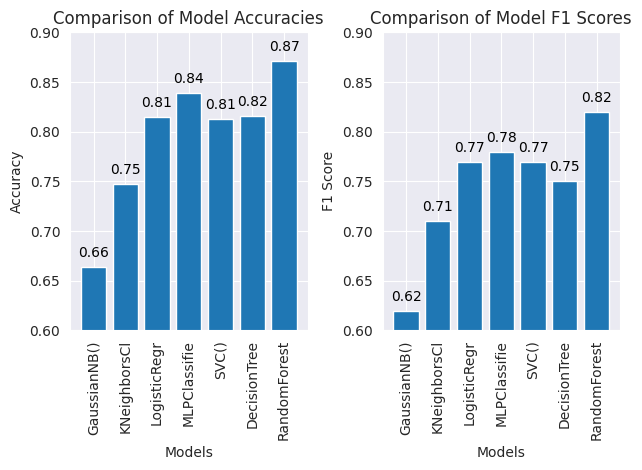

In [69]:
from numpy import argmax
import re

model_list = [gnb, knn, reg, mlp, svc, tree, r_forest]
model_names = [str(m)[:12] for m in model_list]
model_accuracy_list = [m.accuracy for m in model_list]
get_f1 = lambda report: float(re.search('macro avg\s+\d+.\d+\s+\d+.\d+\s+(\d+.\d+)', report).group(1))
model_f1_list = [get_f1(m.classification_report) for m in model_list]

print(f'The most accurate model is: {str(model_list[argmax(model_accuracy_list)])}')
print(f'The highest F1-score model is: {str(model_list[argmax(model_f1_list)])}')

# Set up the matplotlib figure with two subplots, one for accuracy and one for F1 score, using the alternative subplot notation

# Plot for accuracy scores
plt.subplot(121)  # 1 row, 2 columns, 1st subplot
plt.bar(model_names, model_accuracy_list)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim([0.6, 0.9])  # Set y-axis to start from 0.7 to better highlight differences
plt.xticks(rotation='vertical')
# Display values on the bars for accuracy
for i, v in enumerate(model_accuracy_list):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', color='black')

# Plot for F1 scores
plt.subplot(122)  # 1 row, 2 columns, 2nd subplot
plt.bar(model_names, model_f1_list)
plt.title('Comparison of Model F1 Scores')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.ylim([0.6, 0.9])  # Set y-axis to start from 0.6 to better highlight differences
plt.xticks(rotation='vertical')
# Display values on the bars for F1 scores
for i, v in enumerate(model_f1_list):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', color='black')

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()
# Show the plot
plt.show()


### 5. Προετοιμασία αρχείου για την πρώτη υποβολή στο kaggle

5.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις, χρησιμοποιώντας το σύνολο εκπαίδευσης [test set](https://drive.google.com/file/d/18PMqdPSuJ4CurrzYlahooNMJWZ_8n11o/view?usp=sharing).


In [100]:
# first impute in test_data then predict
if 'Unnamed: 0' in test_data.columns:
    test_data.drop('Unnamed: 0', axis=1, inplace=True)
if 'Unnamed: 0.1' in test_data.columns:
    test_data.drop('Unnamed: 0.1', axis=1, inplace=True)


# Fill missing values for numerical features with the median
for column in test_data.select_dtypes(include=np.number).columns:
    median_value = test_data[column].median()
    test_data[column].fillna(median_value, inplace=True)

# Fill missing values for categorical features with the mode
for column in test_data.select_dtypes(include=['object', 'bool']).columns:
    mode_value = test_data[column].mode()[0]
    test_data[column].fillna(mode_value, inplace=True)

y_test_pred = r_forest.model.predict(test_data)
y_test_pred.shape

(9699,)

5.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 5α).

In [101]:
prediction_df = pd.DataFrame({'RainTomorrow': y_test_pred})
prediction_df.to_csv('part1v2_predictions.csv', index=True, index_label='id')

### 6. Βελτιστοποίηση μοντέλων με εύρεση καλύτερων υπερπαραμέτρων των ταξινομητών

6.α. Για τους 7 ταξινομητές βελτιστοποιήστε την επίδοσή τους χρησιμοποιώντας αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 5)  με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων.

In [74]:
from sklearn.model_selection import GridSearchCV
from tqdm.notebook import tqdm

# Load the dataset
final_train_df = pd.read_csv('content/data/final_train.csv')
X = final_train_df.iloc[:, :-1]  # all columns except the last one as features
y = final_train_df.iloc[:, -1]  # the last column as the label

# Define the hyperparameter grid for each classifier
param_grids = {
    'SVM': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'C': [0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']
        }
    },
    'MLP': {
        'model': MLPClassifier(random_state=42),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'activation': ['tanh', 'relu'],
            'max_iter': [300, 500, 700]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_features': ['auto', 'sqrt'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
}

# Initialize dictionary to store the best models and their scores
best_models = {}
best_scores = {}

# Perform grid search for each classifier
for classifier_name in tqdm(param_grids.keys(), desc='Optimizing classifiers', unit='classifier'):
    grid_data = param_grids[classifier_name]
    print(f"Starting grid search for {classifier_name}...")
    grid_search = GridSearchCV(grid_data['model'], grid_data['params'], cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X, y)
    best_models[classifier_name] = grid_search.best_estimator_
    best_scores[classifier_name] = grid_search.best_score_
    print(f"Best F1 score for {classifier_name}: {grid_search.best_score_}")
    print(f"Best parameters for {classifier_name}: {grid_search.best_params_}")

# Print the best models and their F1 scores
print("Best models and their F1 scores:")
for classifier_name, score in best_scores.items():
    print(f"{classifier_name}: {score}")



Optimizing classifiers:   0%|          | 0/6 [00:00<?, ?classifier/s]

Starting grid search for SVM...


/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

6.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).
6.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [75]:
svc_best = Model(SVC(C=1, gamma='auto', kernel='rbf', random_state=42), instant_fit_eval=True)
knn_best = Model(KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance'), instant_fit_eval=True)
reg_best = Model(LogisticRegression(C=0.1, penalty='l2', solver='liblinear'), instant_fit_eval=True)
mlp_best = Model(MLPClassifier(activation='relu', hidden_layer_sizes=(50,), max_iter=500), instant_fit_eval=True)
tree_best = Model(DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2), instant_fit_eval=True)
r_forest_best = Model(
    RandomForestClassifier(max_depth=30, max_features='auto', min_samples_leaf=4, min_samples_split=10,
                           n_estimators=100), instant_fit_eval=True)

SVC(C=1, gamma='auto', random_state=42)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f132f110ae0>
Traceback (most recent call last):
  File "/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^

accuracy:
0.8227438562676396
classification report
:              precision    recall  f1-score   support

         0.0       0.94      0.83      0.88     11184
         1.0       0.58      0.81      0.68      3343

    accuracy                           0.82     14527
   macro avg       0.76      0.82      0.78     14527
weighted avg       0.85      0.82      0.83     14527

KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance')
accuracy:
0.7384869553245681
classification report
:              precision    recall  f1-score   support

         0.0       0.95      0.70      0.80     11184
         1.0       0.46      0.88      0.61      3343

    accuracy                           0.74     14527
   macro avg       0.71      0.79      0.71     14527
weighted avg       0.84      0.74      0.76     14527

LogisticRegression(C=0.1, solver='liblinear')
accuracy:
0.8149652371446272
classification report
:              precision    recall  f1-score   support

         0.0 

/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


accuracy:
0.8645969573896881
classification report
:              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91     11184
         1.0       0.69      0.76      0.72      3343

    accuracy                           0.86     14527
   macro avg       0.81      0.83      0.82     14527
weighted avg       0.87      0.86      0.87     14527


6.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


# Version 2 Results

The most accurate model is: RandomForestClassifier(max_depth=30, max_features='auto', min_samples_leaf=4,
                       min_samples_split=10)
The highest F1-score model is: RandomForestClassifier(max_depth=30, max_features='auto', min_samples_leaf=4,
                       min_samples_split=10)


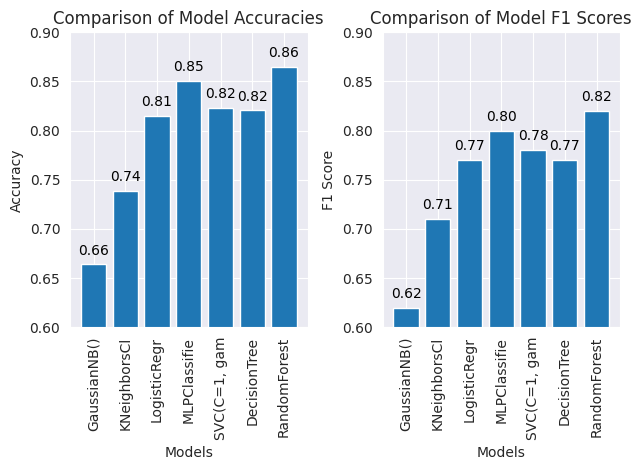

In [76]:
from numpy import argmax
import re

best_model_list = [gnb, knn_best, reg_best, mlp_best, svc_best, tree_best, r_forest_best]
model_names = [str(m)[:12] for m in best_model_list]
model_accuracy_list = [m.accuracy for m in best_model_list]
get_f1 = lambda report: float(re.search('macro avg\s+\d+.\d+\s+\d+.\d+\s+(\d+.\d+)', report).group(1))
model_f1_list = [get_f1(m.classification_report) for m in best_model_list]

print(f'The most accurate model is: {str(best_model_list[argmax(model_accuracy_list)])}')
print(f'The highest F1-score model is: {str(best_model_list[argmax(model_f1_list)])}')

# Set up the matplotlib figure with two subplots, one for accuracy and one for F1 score, using the alternative subplot notation

# Plot for accuracy scores
plt.subplot(121)  # 1 row, 2 columns, 1st subplot
plt.bar(model_names, model_accuracy_list)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim([0.6, 0.9])  # Set y-axis to start from 0.7 to better highlight differences
plt.xticks(rotation='vertical')
# Display values on the bars for accuracy
for i, v in enumerate(model_accuracy_list):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', color='black')

# Plot for F1 scores
plt.subplot(122)  # 1 row, 2 columns, 2nd subplot
plt.bar(model_names, model_f1_list)
plt.title('Comparison of Model F1 Scores')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.ylim([0.6, 0.9])  # Set y-axis to start from 0.6 to better highlight differences
plt.xticks(rotation='vertical')
# Display values on the bars for F1 scores
for i, v in enumerate(model_f1_list):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', color='black')

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()
# Show the plot
plt.show()


In [77]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming you have your dataset loaded as a pandas DataFrame
# and the target variable is named 'RainTomorrow'
data = pd.read_csv('content/data/version2_final_train.csv')

# Separate features and target variable
X = data.drop('RainTomorrow', axis=1).to_numpy()
y = data['RainTomorrow'].to_numpy()

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data into PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

# Create TensorDatasets for the training and validation sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# Define DataLoaders for the training and validation sets
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=64, shuffle=False)


# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)  # Input layer to first hidden layer
        self.fc2 = nn.Linear(64, 32)  # First hidden layer to second hidden layer
        self.fc3 = nn.Linear(32, 1)  # Second hidden layer to output layer
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  # Sigmoid activation for binary classification
        return x

    def eval_results(self):
        global test_data
        # Convert the test data into a PyTorch tensor
        X_test_tensor = torch.tensor(test_data.to_numpy(), dtype=torch.float32)

        # Assuming you have the 'best_model.pth' file in the current directory
        # Load the trained model weights
        self.load_state_dict(torch.load('best_model.pth'))

        # Put the model in evaluation mode
        self.eval()

        # Make predictions
        with torch.no_grad():
            test_preds = self.forward(X_test_tensor)

        # Convert predictions to binary labels
        predicted_labels = test_preds.ge(0.5).view(-1).numpy()
        return predicted_labels

In [78]:

# Initialize the network
net = Net()
print()
# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Define a learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)


# Function for calculating the accuracy
def calculate_accuracy(y_true, y_pred):
    predicted = y_pred.ge(.5).view(-1).cpu()
    return accuracy_score(y_true.cpu(), predicted)


# Function for the training loop
def train_model(num_epochs):
    best_val_accuracy = 0
    for epoch in range(num_epochs):  # Loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Update the learning rate
        scheduler.step()

        # Validation accuracy
        val_preds = torch.cat([net(batch[0]) for batch in val_loader])
        val_accuracy = calculate_accuracy(y_val_tensor, val_preds)

        print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}, Validation Accuracy: {val_accuracy}')

        # Save the best model
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            torch.save(net.state_dict(), 'best_model.pth')

    print('Finished Training')


# Train the model with more epochs
train_model(num_epochs=50)

Epoch 1, Loss: 21.286966769436603, Validation Accuracy: 0.7145069695405266
Epoch 2, Loss: 3.0634630158199334, Validation Accuracy: 0.7678884873515746
Epoch 3, Loss: 0.5594979471991165, Validation Accuracy: 0.7692307692307693
Epoch 4, Loss: 0.5444615632295609, Validation Accuracy: 0.7695405265875065
Epoch 5, Loss: 0.5408017956974482, Validation Accuracy: 0.7698502839442437
Epoch 6, Loss: 0.5392023512337467, Validation Accuracy: 0.7694372741352608
Epoch 7, Loss: 0.5372777695309604, Validation Accuracy: 0.7696437790397522
Epoch 8, Loss: 0.5376857137522681, Validation Accuracy: 0.7699535363964894
Epoch 9, Loss: 0.53712695084586, Validation Accuracy: 0.7700567888487352
Epoch 10, Loss: 0.5357712308073989, Validation Accuracy: 0.7701600413009809
Epoch 11, Loss: 0.535653210561661, Validation Accuracy: 0.7701600413009809
Epoch 12, Loss: 0.5354855586790016, Validation Accuracy: 0.7699535363964894
Epoch 13, Loss: 0.5352996476609321, Validation Accuracy: 0.7703665462054724
Epoch 14, Loss: 0.535904

This result and the results from the tuned models can prove to us that with the current data that we are using to try to forecast the weather the best accuracy and f1 score are 85% and 75% approximately and respectively for all the models
So now the problem to reach higher results isn't the models themselves but the data that we have. Maybe if we processed them differently we would get better results 

### 7. Προετοιμασία αρχείου για τη δεύτερη υποβολή στο kaggle

7.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set)

In [102]:
data.columns.difference(test_data.columns)

Index(['Date', 'Location', 'RainTomorrow', 'WindDir3pm', 'WindDir9am',
       'WindGustDir', 'id'],
      dtype='object')

In [0]:
# we use test_data from step 5.a
# First try with svc then lin_reg finish with ffn
svc_pred = svc_best.model.predict(test_data)
reg_best_pred = reg_best.model.predict(test_data)
r_forest_best_pred = r_forest_best.model.predict(test_data)


# r_forest_new_pred = r_forest_best.model.predict(updated_test_data)

In [106]:

net_pred = net.eval_results()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (9699x111 and 112x64)

7.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 7α).

In [105]:
svc_pred_df = pd.DataFrame({'RainTomorrow': svc_pred})
svc_pred_df.index += 1
svc_pred_df.to_csv('part2_svc_pred.csv', index=True, index_label='id')

reg_pred_df = pd.DataFrame({'RainTomorrow': reg_best_pred})
reg_pred_df.index += 1
reg_pred_df.to_csv('part2_reg_pred.csv', index=True, index_label='id')

r_forest_pred_df = pd.DataFrame({'RainTomorrow': r_forest_best_pred})
r_forest_pred_df.index += 1
r_forest_pred_df.to_csv('part2_net_pred.csv', index=True, index_label='id')